In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack
import scipy
import scipy.io as sio
import copy


---
# VIDEO: What are wavelets?
---


In [3]:
## general simulation parameters

fs = 1024
npnts = fs*5 # 5 seconds

# centered time vector
timevec = np.arange(0,npnts)/fs
timevec = timevec - np.mean(timevec)

# for power spectrum
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))


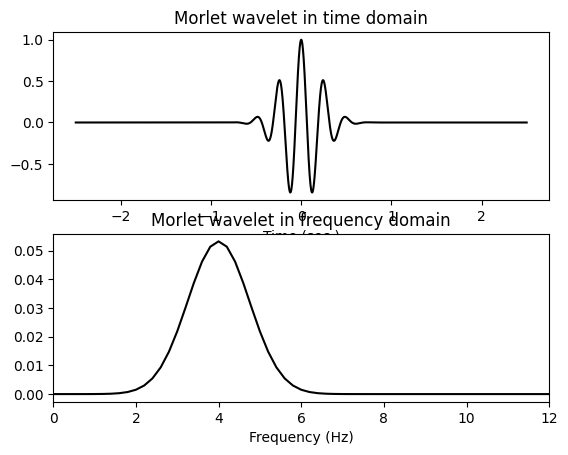

In [4]:
## Morlet wavelet

# parameters
freq = 4 # peak frequency
csw  = np.cos(2*np.pi*freq*timevec) # cosine wave
fwhm = .5 # full-width at half-maximum in seconds
gaussian = np.exp( -(4*np.log(2)*timevec**2) / fwhm**2 ) # Gaussian

# Morlet wavelet
MorletWavelet = csw * gaussian

# amplitude spectrum
MorletWaveletPow = np.abs(scipy.fftpack.fft(MorletWavelet)/npnts)


# time-domain plotting
plt.subplot(211)
plt.plot(timevec,MorletWavelet,'k')
plt.xlabel('Time (sec.)')
plt.title('Morlet wavelet in time domain')

# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,MorletWaveletPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('Morlet wavelet in frequency domain')
plt.show()

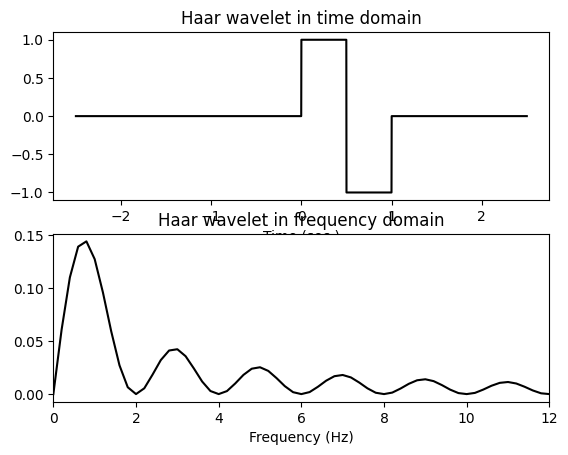

In [5]:
## Haar wavelet

# create Haar wavelet
HaarWavelet = np.zeros(npnts)
HaarWavelet[np.argmin(timevec**2) : np.argmin((timevec-.5)**2) ] = 1
HaarWavelet[np.argmin((timevec-.5)**2) : np.argmin((timevec-1-1/fs)**2)] = -1

# amplitude spectrum
HaarWaveletPow = np.abs(scipy.fftpack.fft(HaarWavelet)/npnts)


# time-domain plotting
plt.subplot(211)
plt.plot(timevec,HaarWavelet,'k')
plt.xlabel('Time (sec.)')
plt.title('Haar wavelet in time domain')

# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,HaarWaveletPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('Haar wavelet in frequency domain')
plt.show()

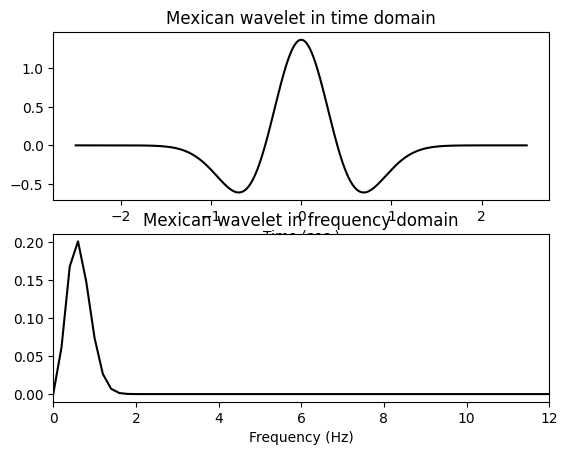

In [6]:
## Mexican hat wavelet

# the wavelet
s = .4
MexicanWavelet = (2/(np.sqrt(3*s)*np.pi**.25)) * (1- (timevec**2)/(s**2) ) * np.exp( (-timevec**2)/(2*s**2) )

# amplitude spectrum
MexicanPow = np.abs(scipy.fftpack.fft(MexicanWavelet)/npnts)


# time-domain plotting
plt.subplot(211)
plt.plot(timevec,MexicanWavelet,'k')
plt.xlabel('Time (sec.)')
plt.title('Mexican wavelet in time domain')

# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,MexicanPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('Mexican wavelet in frequency domain')
plt.show()

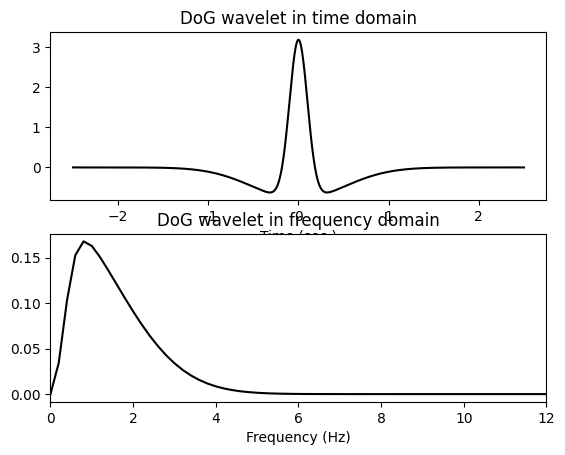

In [7]:
## Difference of Gaussians (DoG)
# (approximation of Laplacian of Gaussian)

# define sigmas
sPos = .1
sNeg = .5

# create the two GAussians
gaus1 = np.exp( (-timevec**2) / (2*sPos**2) ) / (sPos*np.sqrt(2*np.pi))
gaus2 = np.exp( (-timevec**2) / (2*sNeg**2) ) / (sNeg*np.sqrt(2*np.pi))

# their difference is the DoG
DoG = gaus1 - gaus2


# amplitude spectrum
DoGPow = np.abs(scipy.fftpack.fft(DoG)/npnts)


# time-domain plotting
plt.subplot(211)
plt.plot(timevec,DoG,'k')
plt.xlabel('Time (sec.)')
plt.title('DoG wavelet in time domain')

# frequency-domain plotting
plt.subplot(212)
plt.plot(hz,DoGPow[:len(hz)],'k')
plt.xlim([0,freq*3])
plt.xlabel('Frequency (Hz)')
plt.title('DoG wavelet in frequency domain')
plt.show()


---
# VIDEO: Convolution with wavelets
---


In [8]:
## general simulation parameters

fs = 1024
npnts = fs*5 # 5 seconds

# centered time vector
timevec = np.arange(0,npnts)/fs
timevec = timevec - np.mean(timevec)

# for power spectrum
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))


In [9]:
### create wavelets

# parameters
freq = 4 # peak frequency
csw  = np.cos(2*np.pi*freq*timevec) # cosine wave
fwhm = .5 # full-width at half-maximum in seconds
gaussian = np.exp( -(4*np.log(2)*timevec**2) / fwhm**2 ) # Gaussian


## Morlet wavelet
MorletWavelet = csw * gaussian


## Haar wavelet
HaarWavelet = np.zeros(npnts)
HaarWavelet[np.argmin(timevec**2) : np.argmin( (timevec-.5)**2 )] = 1
HaarWavelet[np.argmin((timevec-.5)**2) : np.argmin( (timevec-1-1/fs)**2 )] = -1


## Mexican hat wavelet
s = .4
MexicanWavelet = (2/(np.sqrt(3*s)*np.pi**.25)) * (1- (timevec**2)/(s**2) ) * np.exp( (-timevec**2)/(2*s**2) )


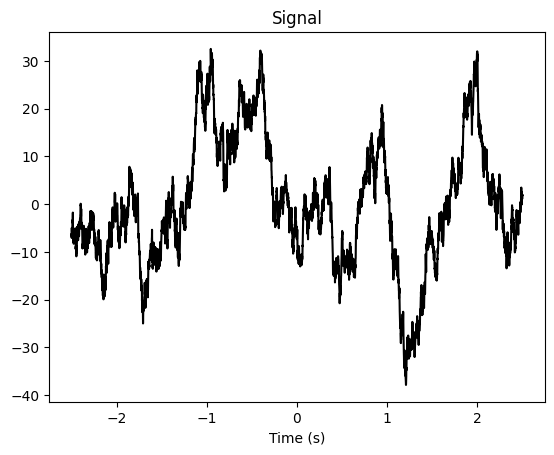

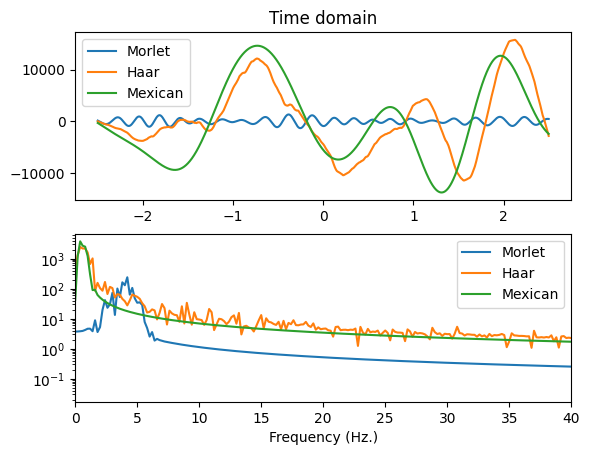

In [10]:
## convolve with random signal

# signal
signal1 = scipy.signal.detrend(np.cumsum(np.random.randn(npnts)))

# convolve signal with different wavelets
morewav = np.convolve(signal1,MorletWavelet,'same')
haarwav = np.convolve(signal1,HaarWavelet,'same')
mexiwav = np.convolve(signal1,MexicanWavelet,'same')

# amplitude spectra
morewaveAmp = np.abs(scipy.fftpack.fft(morewav)/npnts)
haarwaveAmp = np.abs(scipy.fftpack.fft(haarwav)/npnts)
mexiwaveAmp = np.abs(scipy.fftpack.fft(mexiwav)/npnts)



### plotting
# the signal
plt.plot(timevec,signal1,'k')
plt.title('Signal')
plt.xlabel('Time (s)')
plt.show()


# the convolved signals
plt.subplot(211)
plt.plot(timevec,morewav,label='Morlet')
plt.plot(timevec,haarwav,label='Haar')
plt.plot(timevec,mexiwav,label='Mexican')
plt.title('Time domain')
plt.legend()


# spectra of convolved signals
plt.subplot(212)
plt.plot(hz,morewaveAmp[:len(hz)],label='Morlet')
plt.plot(hz,haarwaveAmp[:len(hz)],label='Haar')
plt.plot(hz,mexiwaveAmp[:len(hz)],label='Mexican')
plt.yscale('log')
plt.xlim([0,40])
plt.legend()
plt.xlabel('Frequency (Hz.)')
plt.show()



---
# VIDEO: Wavelet convolution for narrowband filtering
---


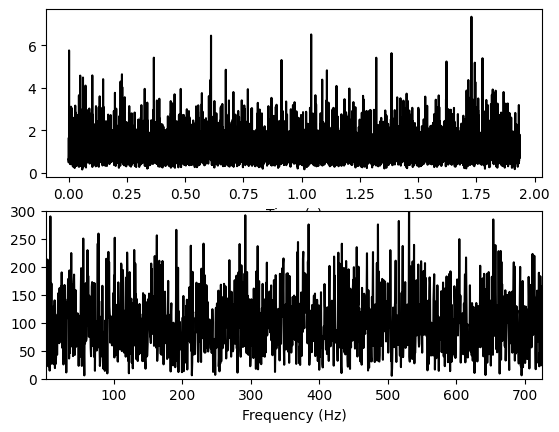

In [11]:
# simulation parameters
srate = 4352 # hz
npnts = 8425
time  = np.arange(0,npnts)/srate
hz    = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))

# pure noise signal
signal1 = np.exp( .5*np.random.randn(npnts) )

# let's see what it looks like
plt.subplot(211)
plt.plot(time,signal1,'k')
plt.xlabel('Time (s)')

# in the frequency domain
signalX = 2*np.abs(scipy.fftpack.fft(signal1))
plt.subplot(212)
plt.plot(hz,signalX[:len(hz)],'k')
plt.xlim([1,srate/6])
plt.ylim([0,300])
plt.xlabel('Frequency (Hz)')
plt.show()


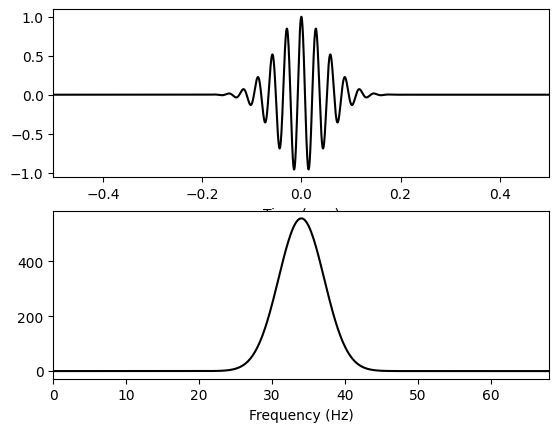

In [12]:
## create and inspect the Morlet wavelet

# wavelet parameters
ffreq = 34  # filter frequency in Hz
fwhm  = .12 # full-width at half-maximum in seconds
wavtime = np.arange(-3,3,1/srate) # wavelet time vector (same sampling rate as signal!)

# create the wavelet
morwav = np.cos(2*np.pi*ffreq*wavtime) * np.exp( -(4*np.log(2)*wavtime**2) / fwhm**2 )


# amplitude spectrum of wavelet
# (note that the wavelet needs its own hz because different length)
wavehz  = np.linspace(0,srate/2,int(np.floor(len(wavtime)/2)+1))
morwavX = 2*np.abs(scipy.fftpack.fft(morwav))


# plot it!
plt.subplot(211)
plt.plot(wavtime,morwav,'k')
plt.xlim([-.5,.5])
plt.xlabel('Time (sec.)')

plt.subplot(212)
plt.plot(wavehz,morwavX[:len(wavehz)],'k')
plt.xlim([0,ffreq*2])
plt.xlabel('Frequency (Hz)')
plt.show()

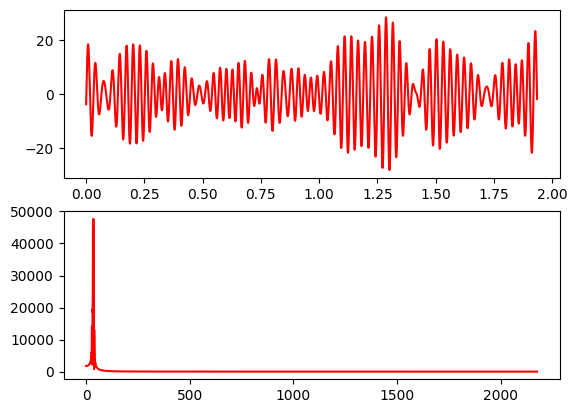

In [13]:
## now for convolution

convres = scipy.signal.convolve(signal1,morwav,'same')

# show in the time domain
plt.subplot(211)
plt.plot(time,convres,'r')

# and in the frequency domain
plt.subplot(212)
convresX = 2*np.abs(scipy.fftpack.fft(convres))
plt.plot(hz,convresX[:len(hz)],'r')
plt.show()
### Time-domain wavelet normalization is... annoying and difficult.
### Let's do it in the frequency domain


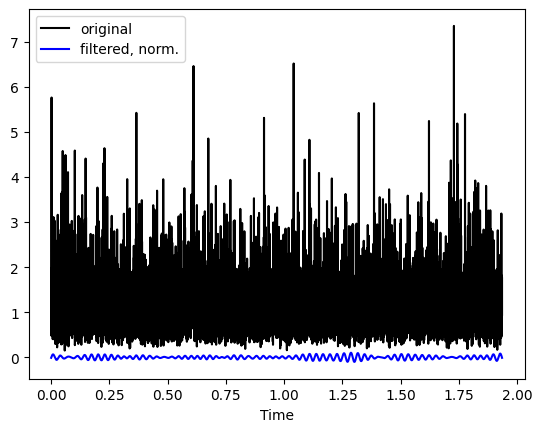

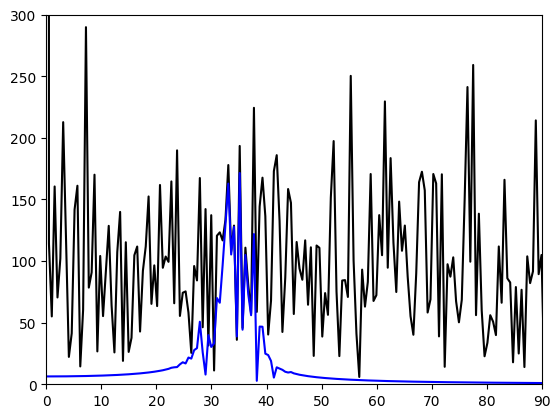

In [14]:
### "manual" convolution

nConv = npnts + len(wavtime) - 1
halfw = int( np.floor(len(wavtime)/2) )

# spectrum of wavelet
morwavX = scipy.fftpack.fft(morwav,nConv)

# now normalize in the frequency domain
## note: ensure we're taking the magnitude of the peak; 
#  I didn't explain this in the video but it ensures normalization by
#  the magnitude and not the complex value.
morwavX = morwavX / np.abs(np.max(morwavX))
# also equivalent:
morwavX = (np.abs(morwavX)/max(np.abs(morwavX))) * np.exp(1j*np.angle(morwavX))

# now for the rest of convolution
convres = scipy.fftpack.ifft( morwavX * scipy.fftpack.fft(signal1,nConv) )
convres = np.real( convres[halfw:-halfw+1] )


# time domain
plt.plot(time,signal1,'k',label='original')
plt.plot(time,convres,'b',label='filtered, norm.')
plt.legend()
plt.xlabel('Time')
plt.show()

# frequency domain
convresX = 2*np.abs(scipy.fftpack.fft(convres))
plt.plot(hz,signalX[:len(hz)],'k',label='original')
plt.plot(hz,convresX[:len(hz)],'b',label='filtered, norm.')
plt.ylim([0,300])
plt.xlim([0,90])
plt.show()

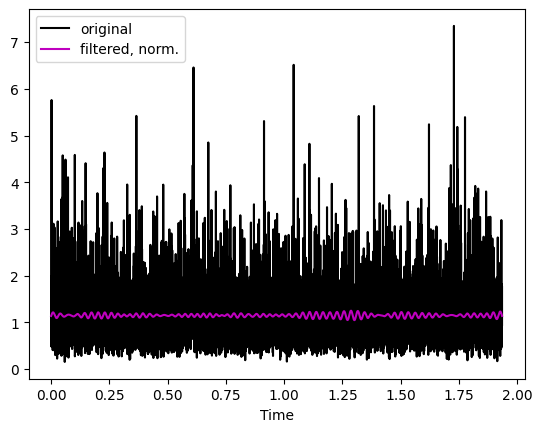

In [15]:
## to preserve DC offset, compute and add back

convres = convres + np.mean(signal1)

plt.plot(time,signal1,'k',label='original')
plt.plot(time,convres,'m',label='filtered, norm.')
plt.legend()
plt.xlabel('Time')
plt.show()


---
# Time-frequency analysis with complex wavelets
---


In [16]:
# data from http://www.vibrationdata.com/Solomon_Time_History.zip

equake = np.loadtxt('Solomon_Time_History.txt')

# more convenient
times  = equake[:,0]
equake = equake[:,1]
srate  = np.round( 1/np.mean(np.diff(times)) )


## plot the signal

# time domain
plt.subplot(211)
plt.plot(times/60/60,equake)
plt.xlim([times[0]/60/60,times[-1]/60/60])
plt.xlabel('Time (hours)')

# frequency domain using pwelch
plt.subplot(212)
winsize = srate*60*10 # window size of 10 minutes
f, welchpow = scipy.signal.welch(equake,fs=srate,window=np.hanning(winsize),nperseg=winsize,noverlap=winsize/4)
plt.semilogy(f,welchpow)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power')
plt.ylim([10e-11,10e-6])
plt.show()


OSError: Solomon_Time_History.txt not found.

In [17]:
## setup time-frequency analysis

# parameters (in Hz)
numFrex = 40
minFreq =  2
maxFreq = srate/2
npntsTF = 1000 # this one's in points

# frequencies in Hz
frex  = np.linspace(minFreq,maxFreq,numFrex)

# wavelet widths (FWHM in seconds)
fwhms = np.linspace(5,15,numFrex)


# time points to save for plotting
tidx = np.arange(1,len(times),npntsTF)


# setup wavelet and convolution parameters
wavet = np.arange(-10,10,1/srate)
halfw = int(np.floor(len(wavet)/2))
nConv = len(times) + len(wavet) - 1


# create family of Morlet wavelets
cmw = np.zeros((len(wavet),numFrex),dtype=complex)
# loop over frequencies and create wavelets
for fi in range(0,numFrex):
    cmw[:,fi] = np.exp(2*1j*np.pi*frex[fi]*wavet)*np.exp(-(4*np.log(2)*wavet**2)/fwhms[fi]**2)
    
# plot them
plt.pcolormesh(wavet,frex,np.abs(cmw).T,vmin=0,vmax=1)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.show()


NameError: name 'times' is not defined

In [ ]:
## run convolution

# initialize time-frequency matrix
tf  = np.zeros((len(frex),len(tidx)))
tfN = np.zeros((len(frex),len(tidx)))

# baseline time window for normalization
basetidx = [0,0]
basetidx[0] = np.argmin( (times--1000)**2 )
basetidx[1] = np.argmin( times**2 )
basepow     = np.zeros(numFrex)


# spectrum of data
dataX = scipy.fftpack.fft(equake,nConv)

# loop over frequencies for convolution
for fi in range(0,numFrex):
    
    # create wavelet
    waveX = scipy.fftpack.fft( cmw[:,fi],nConv )
    
    ## note: ensure we're taking the magnitude of the peak; 
    #  I didn't explain this in the video but it ensures normalization by
    #  the magnitude and not the complex value.
    waveX = waveX / np.abs(np.max(waveX))
    
    # convolve
    as1 = scipy.fftpack.ifft( waveX*dataX )
    # trim
    as1 = as1[halfw:-halfw]
    
    # power time course at this frequency
    powts = np.abs(as1)**2
    
    # baseline (pre-quake)
    basepow[fi] = np.mean(powts[range(basetidx[0],basetidx[1])])
    
    tf[fi,:]  = 10*np.log10( powts[tidx] )
    tfN[fi,:] = 10*np.log10( powts[tidx]/basepow[fi] )
    

In [ ]:
## show time-frequency maps

# "raw" power
plt.subplot(211)
plt.pcolormesh(times[tidx],frex,tf,vmin=-150,vmax=-70)
plt.xlabel('Time'), plt.ylabel('Frequency (Hz)')
plt.title('"Raw" time-frequency power')

# pre-quake normalized power
plt.subplot(212)
plt.pcolormesh(times[tidx],frex,tfN,vmin=-15,vmax=15)
plt.xlabel('Time'), plt.ylabel('Frequency (Hz)')
plt.title('"Raw" time-frequency power')
plt.show()


## normalized and non-normalized power
plt.subplot(211)
plt.plot(frex,np.mean(tf,axis=1),'ks-')
plt.xlabel('Frequency (Hz)'), plt.ylabel('Power (10log_{10})')
plt.title('Raw power')

plt.subplot(212)
plt.plot(frex,np.mean(tfN,axis=1),'ks-')
plt.xlabel('Frequency (Hz)'), plt.ylabel('Power (norm.)')
plt.title('Pre-quake normalized power')
plt.show()


---
# VIDEO: Time-frequency analysis of brain signals
---


In [ ]:
# load in data
braindat = sio.loadmat('data4TF.mat')
timevec = braindat['timevec'][0]
srate = braindat['srate'][0]
data = braindat['data'][0]

# plot the signal
plt.plot(timevec,data)
plt.xlabel('Time (s)'), plt.ylabel('Voltage (\muV)')
plt.title('Time-domain signal')
plt.show()

In [ ]:
## create complex Morlet wavelets

# wavelet parameters
nfrex = 50 # 50 frequencies
frex  = np.linspace(8,70,nfrex)
fwhm  = .2 # full-width at half-maximum in seconds

# time vector for wavelets
wavetime = np.arange(-2,2,1/srate)


# initialize matrices for wavelets
wavelets = np.zeros( (nfrex,len(wavetime)) ,dtype=complex)

# create complex Morlet wavelet family
for wi in range(0,nfrex):
    # Gaussian
    gaussian = np.exp( -(4*np.log(2)*wavetime**2) / fwhm**2 )
    
    # complex Morlet wavelet
    wavelets[wi,:] = np.exp(1j*2*np.pi*frex[wi]*wavetime) * gaussian
    

# show the wavelets
plt.plot(wavetime,np.real(wavelets[10,:]),label='Real part')
plt.plot(wavetime,np.imag(wavelets[10,:]),label='Imag part')
plt.xlabel('Time')
plt.xlim([-.5, .5])
plt.legend()
plt.show()

plt.pcolormesh(wavetime,frex,np.real(wavelets))
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Real part of wavelets')
plt.xlim([-.5,.5])
plt.show()

In [ ]:
## run convolution using spectral multiplication

# convolution parameters
nconv = len(timevec) + len(wavetime) - 1 # M+N-1
halfk = int( np.floor(len(wavetime)/2) )

# Fourier spectrum of the signal
dataX = scipy.fftpack.fft(data,nconv)

# initialize time-frequency matrix
tf = np.zeros( (nfrex,len(timevec)) )


# convolution per frequency
for fi in range(0,nfrex):
    
    # FFT of the wavelet
    waveX = scipy.fftpack.fft(wavelets[fi,:],nconv)
    # amplitude-normalize the wavelet
    waveX = waveX / np.abs(np.max(waveX))
    
    # convolution
    convres = scipy.fftpack.ifft( waveX*dataX )
    # trim the "wings"
    convres = convres[halfk-1:-halfk]
    
    # extract power from complex signal
    tf[fi,:] = np.abs(convres)**2

In [ ]:
## plot the results

plt.pcolormesh(timevec,frex,tf,vmin=0,vmax=1e3)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Time-frequency power')
plt.show()